In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

In [42]:
# Define constants
# TRAIN_SAMPLES = 5000
# VALIDATION_SAMPLES = 1000
# TEST_SAMPLES = 1000
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32

In [43]:
# Load Cats & Dogs dataset
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [44]:
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    './cats_vs_dogs_small/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


In [45]:
validation_generator = validation_datagen.flow_from_directory(
    './cats_vs_dogs_small/validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [46]:
 test_generator = test_datagen.flow_from_directory(
    './cats_vs_dogs_small/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


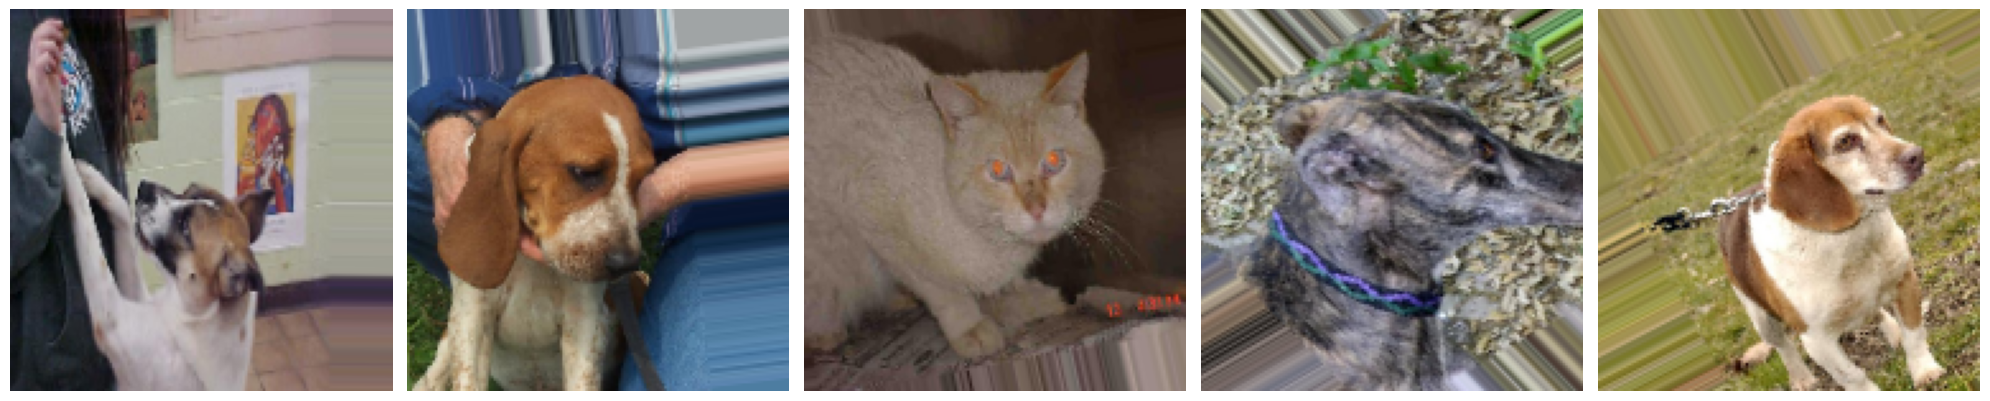

In [47]:
# plot  images
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
sample_training_images, _ = next(train_generator)
plot_images(sample_training_images[:5])



In [54]:
# Define CNN architecture using pretrained VGG16
def create_model_pretrained():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    conv_base.trainable = False
    
    model = models.Sequential([
        conv_base,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])
    return model


In [55]:
import warnings
warnings.filterwarnings('ignore')

# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


In [56]:
import warnings
warnings.filterwarnings('ignore')

# Compile the model
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy']
)


In [57]:
# Define the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [58]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)


Epoch 1/10
62/62 [==============================] - 98s 2s/step - loss: 0.6937 - accuracy: 0.4959 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 2/10
62/62 [==============================] - 66s 1s/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.4990
Epoch 3/10
62/62 [==============================] - 155s 3s/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 4/10
62/62 [==============================] - 159s 3s/step - loss: 0.6932 - accuracy: 0.4614 - val_loss: 0.6931 - val_accuracy: 0.4990
Epoch 5/10
62/62 [==============================] - 162s 3s/step - loss: 0.6932 - accuracy: 0.4848 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 6/10
62/62 [==============================] - 162s 3s/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 7/10
62/62 [==============================] - 149s 2s/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5000


In [59]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.2f}')


32/32 [==============================] - 34s 1s/step - loss: 0.6931 - accuracy: 0.5000
Test accuracy: 0.50


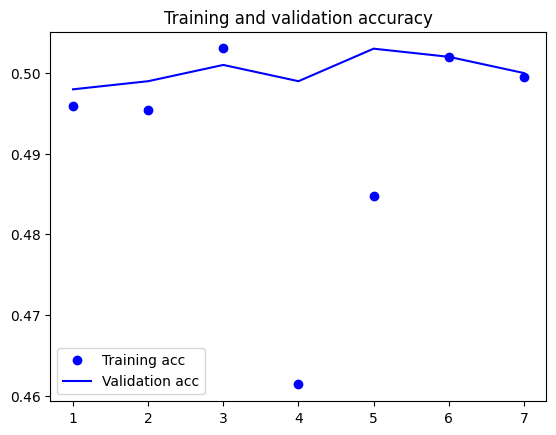

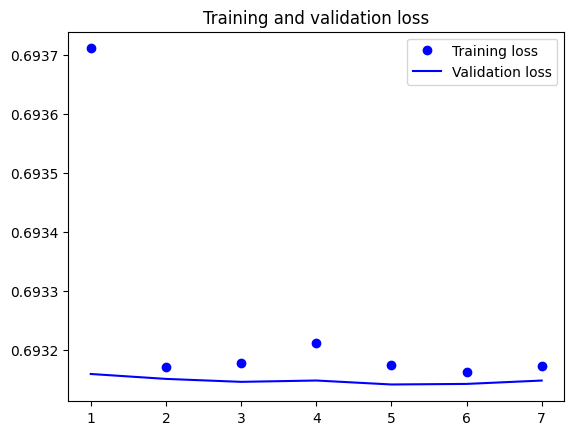

In [60]:
# Plot the training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
plot_training_history(history)


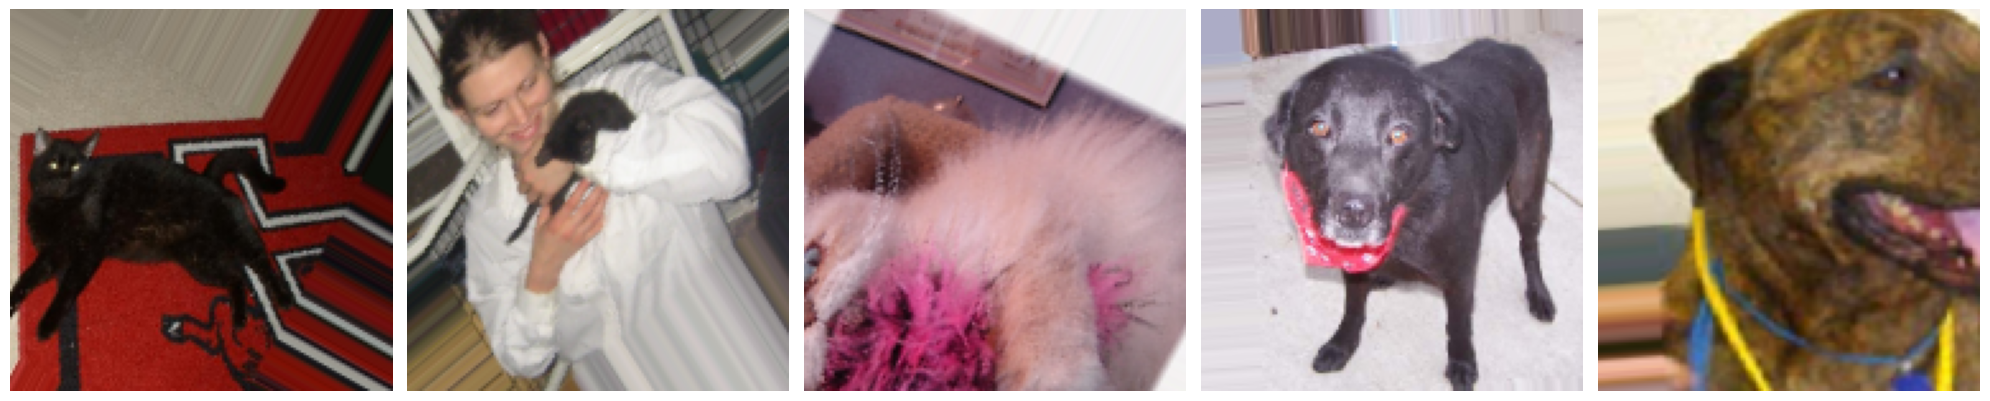

In [63]:
# scatter plot
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
sample_training_images, _ = next(train_generator)
plot_images(sample_training_images[:5])



